<a href="https://colab.research.google.com/github/valenottaviano/Monthly-Revenue-LSTM/blob/main/Monthly_Revenue_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional, Flatten

In [2]:
df = pd.read_csv('/content/Month_Value_1.csv', index_col=['Period'])
df.index = pd.to_datetime(df.index)
series_dt = df['Revenue'].dropna()
series = series_dt.values
series.shape = (series.shape[0],1)

In [3]:
series.shape

(64, 1)

In [8]:
df['Revenue'].dropna()

Period
2015-01-01    1.601007e+07
2015-01-02    1.580759e+07
2015-01-03    2.204715e+07
2015-01-04    1.881458e+07
2015-01-05    1.402148e+07
                  ...     
2019-01-12    5.875647e+07
2020-01-01    5.628830e+07
2020-01-02    4.022524e+07
2020-01-03    5.002217e+07
2020-01-04    5.232069e+07
Name: Revenue, Length: 64, dtype: float64

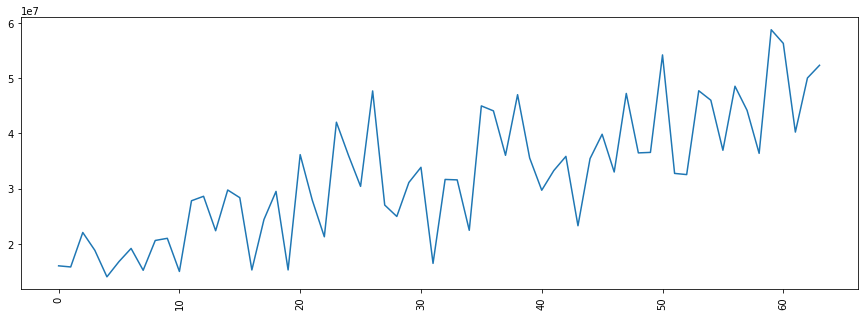

In [4]:
plt.figure(figsize=(15,5))
plt.plot(series)
plt.xticks(rotation=90)
plt.show()

In [9]:
def split_dataset(data):
    # split into standard weeks
    train, test = data[:-12], data[-12:]
    # restructure into windows of weekly data
    train = np.array(np.split(train, len(train)/4))
    test = np.array(np.split(test, len(test)/4))
    return train, test

def to_supervised(train, n_input, n_out):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end < len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    return np.array(X), np.array(y)

In [ ]:
train, test = split_dataset(series)
output_shape = 3
input_shape = 6

train_X, train_y = to_supervised(train, input_shape, output_shape)
test_X, test_y = to_supervised(test, input_shape, output_shape)

# for i in range(train_X.shape[0]):
#   print(train_X[i].flatten(), train_y[i])

In [ ]:
# define parameters
verbose, epochs, batch_size = 1, 100, 3
n_timesteps, n_features, n_outputs = train_X.shape[1], train_X.shape[2], train_y.shape[1]


# define model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True)))
# model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.1))
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=0.2)

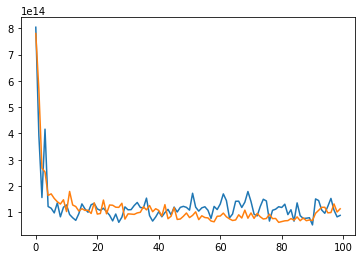

In [24]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

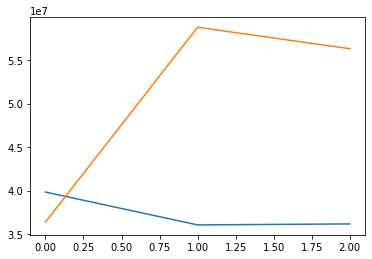

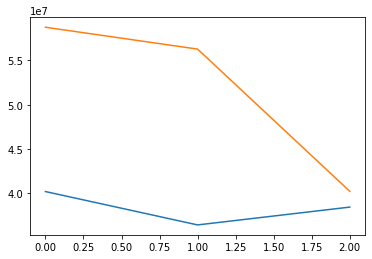

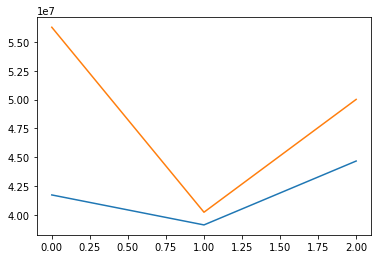

In [28]:
for i in range(len(test_X)):
  y_hat = model.predict(test_X[i].reshape(1,6,1))
  plt.figure()
  plt.plot(y_hat.flatten())
  plt.plot(test_y[i].flatten())
  plt.show()

In [26]:
model.predict(test_X[0].reshape(1,6,1))

array([[39832504., 36061084., 36175240.]], dtype=float32)

In [27]:
test_y

array([[36374956.4944, 58756473.6608, 56288300.87  ],
       [58756473.6608, 56288300.87  , 40225243.264 ],
       [56288300.87  , 40225243.264 , 50022165.2325]])